In [3]:
import os
import csv
import pandas as pd
import numpy as np
from IPython.display import clear_output
import ast
import pymongo as pm
from datetime import datetime


### Look at test annotations db

In [145]:
# set vars 
auth = pd.read_csv('auth.txt', header = None) # this auth.txt file contains the password for the stanford-cogsci.org user
pswd = auth.values[0][0]
conn = pm.MongoClient('mongodb://stanford:' + pswd + '@127.0.0.1')
db = conn['kiddraw']
coll = db['invalid_draw_test']

In [146]:
## how many bad images were annotated?
coll.count()

122

In [126]:
### look at a test annotation
test_annotation = coll.find_one()
test_annotation

{u'__v': 0,
 u'_id': ObjectId('5f3ee6a91ccd787df44da437'),
 u'age': u'age2',
 u'class': u'a whale',
 u'date': datetime.datetime(2020, 8, 20, 21, 9, 49, 256000),
 u'filename': u'a whale_sketch_age2_cdm_run_v51551556208568.png',
 u'session_id': u'cdm_run_v51551556208568',
 u'worker_id': u'A275HKY8EPXRBI'}

### Look in collection of the images that were shown

In [147]:
## these don't store whether things were invalid/valid -- just whether they were shown
test_set = db['check_invalid_v5_dev_smaller']

In [148]:
things = test_set.find({'class':{'$exists':True}})

In [149]:
df = pd.DataFrame(things)
df = df.assign(numGames = df.apply(lambda x: len(x['games']), axis=1))

In [150]:
df

,_id,age,class,filename,games,session_id,shuffler_ind,updatedAt,url,numGames
0,5f3ee2d2aa5864286469f667,age2,square,square_sketch_age2_cdm_run_v51551378173946.png,[A275HKY8EPXRBI],cdm_run_v51551378173946,9389,2020-08-20 21:27:33.854,https://kiddraw.s3.amazonaws.com/square_sketch...,1
1,5f3ee2d2aa5864286469f668,age2,this square,this square_sketch_age2_cdm_run_v5155137817394...,[A275HKY8EPXRBI],cdm_run_v51551378173946,9368,2020-08-20 21:27:01.278,https://kiddraw.s3.amazonaws.com/this square_s...,1
2,5f3ee2d2aa5864286469f669,age2,a tiger,a tiger_sketch_age2_cdm_run_v51551378173946.png,"[, A275HKY8EPXRBI]",cdm_run_v51551378173946,6532,2020-08-20 21:26:28.727,https://kiddraw.s3.amazonaws.com/a tiger_sketc...,2
3,5f3ee2d2aa5864286469f66a,age2,a cactus,a cactus_sketch_age2_cdm_run_v51551378173946.png,[A275HKY8EPXRBI],cdm_run_v51551378173946,12259,2020-08-20 21:12:42.107,https://kiddraw.s3.amazonaws.com/a cactus_sket...,1
4,5f3ee2d2aa5864286469f66b,age6,square,square_sketch_age6_cdm_run_v51551378776163.png,[A275HKY8EPXRBI],cdm_run_v51551378776163,6685,2020-08-20 21:13:55.384,https://kiddraw.s3.amazonaws.com/square_sketch...,1
5,5f3ee2d2aa5864286469f66c,age6,shape,shape_sketch_age6_cdm_run_v51551378776163.png,"[, A275HKY8EPXRBI]",cdm_run_v51551378776163,3682,2020-08-20 21:27:47.615,https://kiddraw.s3.amazonaws.com/shape_sketch_...,2
6,5f3ee2d2aa5864286469f66d,age6,this square,this square_sketch_age6_cdm_run_v5155137877616...,[A275HKY8EPXRBI],cdm_run_v51551378776163,10849,2020-08-20 21:27:01.278,https://kiddraw.s3.amazonaws.com/this square_s...,1
7,5f3ee2d2aa5864286469f66e,age6,a whale,a whale_sketch_age6_cdm_run_v51551378776163.png,[A275HKY8EPXRBI],cdm_run_v51551378776163,9299,2020-08-20 21:09:44.673,https://kiddraw.s3.amazonaws.com/a whale_sketc...,1
8,5f3ee2d2aa5864286469f66f,age6,a hat,a hat_sketch_age6_cdm_run_v51551378776163.png,[A275HKY8EPXRBI],cdm_run_v51551378776163,2945,2020-08-20 21:13:17.352,https://kiddraw.s3.amazonaws.com/a hat_sketch_...,1
9,5f3ee2d2aa5864286469f670,age6,square,square_sketch_age6_cdm_run_v51551379596662.png,[A275HKY8EPXRBI],cdm_run_v51551379596662,13385,2020-08-20 21:27:33.854,https://kiddraw.s3.amazonaws.com/square_sketch...,1


In [134]:
### all images have been seen at least once (some more because I did the HIT once not on the sandbox)
assert sum(df['numGames']>=1) == df['numGames'].count()

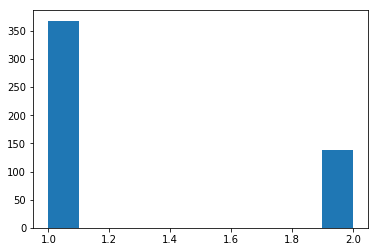

In [135]:
from matplotlib import pyplot
%matplotlib inline
plt = pyplot
h = plt.hist(df['numGames'].values)

In [ ]:
print(df['shuffler_ind'].values)

In [137]:
df.sort_values(by='shuffler_ind', inplace=True)

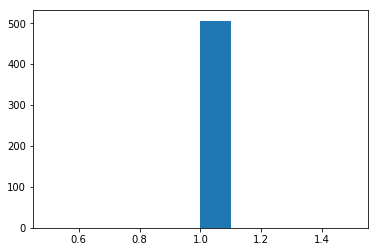

In [139]:
### every shuffler value ony appears once
from collections import Counter
h = plt.hist(Counter(df['shuffler_ind'].values).values())#